In [ ]:
#Importing required libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [ ]:
#Loading the iris data
data = load_iris()

In [ ]:
data

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [ ]:
data.data.shape

(150, 4)

In [ ]:
print('Classes to predict: ', data.target_names)

Classes to predict:  ['setosa' 'versicolor' 'virginica']


In [ ]:
print('Features: ', data.feature_names)

Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
#First four rows from the dataset.
data.data[:4]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]])

In [ ]:
data.target[:4]

array([0, 0, 0, 0])

In [ ]:
# Extracting data attributes / features
X = data.data

# Extracting target/ class labels
y = data.target

In [ ]:
#Shape of the dataset
display(X.shape, y.shape)

(150, 4)

(150,)

In [ ]:
# Import library for splitting the dataset into train and test.
from sklearn.model_selection import train_test_split

In [ ]:
#Using the train_test_split to create train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 50, test_size = 0.25)

In [ ]:
#Importing the Decision tree classifier from the sklearn library.
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#prediction
y_pred = clf.predict(X_test)

In [ ]:
#Importing the accuracy metric from sklearn.metrics library
from sklearn.metrics import accuracy_score

In [ ]:
print('Accuracy Score on train data (using Default criterionas gini): ', accuracy_score(y_true=y_train, y_pred=clf.predict(X_train)))
print('Accuracy Score on test data (using Default criterionas gini): ', accuracy_score(y_true=y_test, y_pred=y_pred))

Accuracy Score on train data (using Default criterionas gini):  1.0
Accuracy Score on test data (using Default criterionas gini):  0.9473684210526315


In [ ]:
# Changing the Criterion to Entropy
clf_entropy = DecisionTreeClassifier(criterion = 'entropy')

In [ ]:
#Training the decision tree classifier. 
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#Predicting labels on the test set.
y_pred_entropy =  clf_entropy.predict(X_test)

In [ ]:
print('Accuracy Score on train data (using Default criterion as Entropy): ', accuracy_score(y_true=y_train, y_pred =clf_entropy.predict(X_train)))
print('Accuracy Score on test data (using Default criterion as Entropy): ', accuracy_score(y_true=y_test, y_pred =y_pred_entropy))

Accuracy Score on train data (using Default criterion as Entropy):  1.0
Accuracy Score on test data (using Default criterion as Entropy):  0.9473684210526315


In [ ]:
# After tune the parameters of the decision tree to increase its accuracy
clf2 = DecisionTreeClassifier( min_samples_split=50)
clf2.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
print('Accuracy Score on train data (using Default criterion as Entropy & min_samples_split): ', accuracy_score(y_true=y_train, y_pred=clf2.predict(X_train)))
print('Accuracy Score on the test data (using Default criterion as Entropy & min_samples_split): ', accuracy_score(y_true=y_test, y_pred=clf2.predict(X_test)))

Accuracy Score on train data (using Default criterion as Entropy & min_samples_split):  0.9642857142857143
Accuracy Score on the test data (using Default criterion as Entropy & min_samples_split):  0.9473684210526315


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred) 

In [ ]:
cm

array([[11,  0,  0],
       [ 0, 14,  1],
       [ 0,  1, 11]])

# Visualize the Tree

In [ ]:
!pip install pydotplus

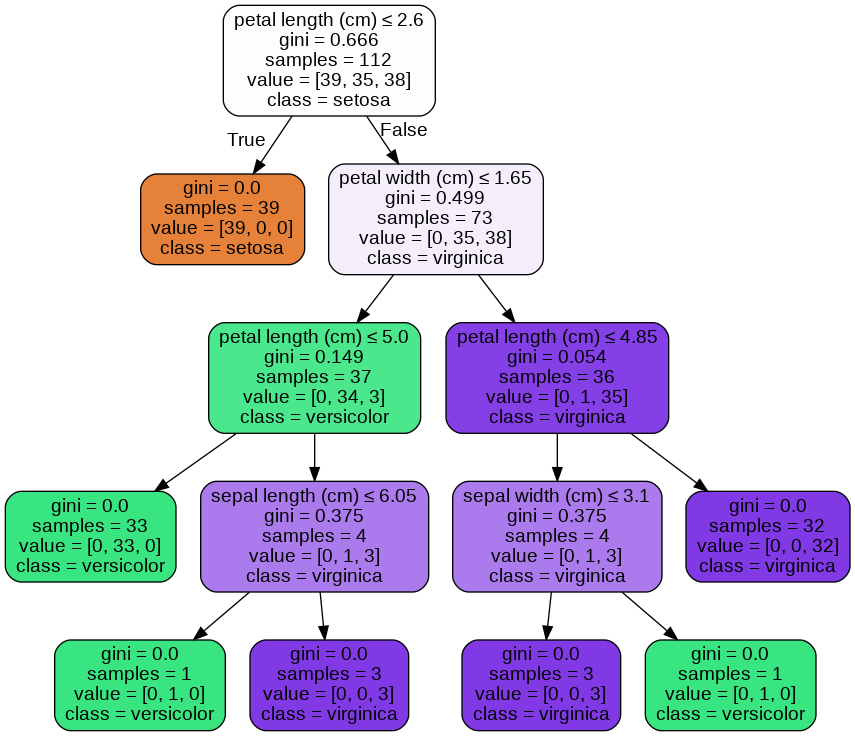

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = data.feature_names,class_names=data.target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Decision Tree with Regression

In [ ]:
from sklearn import tree

In [ ]:
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]

In [ ]:
clf = tree.DecisionTreeRegressor()

In [ ]:
clf = clf.fit(X, y)

In [ ]:
clf.predict([[1, 1]])

array([0.5])